# Manipulate Neuroimaging Data with Python

This notebook is a revision of the excellent [Dartbrains Introductory Notebook](https://dartbrains.org/content/Introduction_to_Neuroimaging_Data.html).

**TIP**: Some of these cells are slow to run! To determine whether a cell has been run, look at the square brackets on the left:
- `[ ]` indicates the cell has not been run
- `[*]` indicates the cell is running.  Be patient!
- A number in the brackets, e.g., `[35]`, indicates that the cell has been run, and you can move on to the next one. 

---
# Neuroimaging Libraries

Many Python neuroimaging libraries exist and more are being developed.    
In this notebook, you will explore the following libraries:   
- [PyBIDS](https://bids-standard.github.io/pybids/), a library for working with Brain Imaging Data Structure BIDS data
- [nibabel](https://nipy.org/packages/nilearn/index.html), Reads and writes common neuroimaging file formats.
- [nilearn](https://nipy.org/packages/nilearn/index.html), Fast and easy statistical learning on neuroimaging data.
- [NLTools](https://nltools.org/auto_examples/index.html), For analyzing neuroimaging data, including tools to perform data manipulation and analyses such as univariate GLMs, predictive multivariate modeling, and representational similarity analyses.

---
# Get the Data

Download the data we will be using from [OSF](https://osf.io/5q3m8) with *wget*, unzip it and clean up the zip file.

In [ ]:
import os
import wget

site_url = 'https://osf.io/5q3m8/download'

if (not os.path.isdir('data')):
    wget.download(site_url)

In [ ]:
import zipfile

with zipfile.ZipFile('Jupyter_neuro_data.zip','r') as zip_ref: 
    zip_ref.extractall(path=None)

In [ ]:
import os

if os.path.exists('Jupyter_neuro_data.zip'):
   os.remove('Jupyter_neuro_data.zip')


---
# BIDS: Brain Imaging Dataset Specification

- There has been a growing interest in sharing datasets across labs and even on public repositories such as [openneuro](https://openneuro.org/). In order to make this a successful enterprise, it is necessary to have some standards for how the data are named and organized. Historically, each lab has used their own idiosyncratic conventions, which can make it difficult for outsiders to analyze. In the past few years, there have been heroic efforts by the neuroimaging community to create a standardized file organization and naming practices. This specification is called **BIDS** for [Brain Imaging Dataset Specification](http://bids.neuroimaging.io/).
- Because BIDS is a consistent format, it is possible to use a python package to make it easy to query a dataset. Here we using [PyBIDS](https://github.com/bids-standard/pybids).

## PyBIDS BIDSLayout

[PyBIDS](https://github.com/bids-standard/pybids) is a package to help query and navigate a neuroimaging dataset that is in the BIDs format. At the core of PyBIDS is the `BIDSLayout` object. A `BIDSLayout` is a lightweight Python class that represents a BIDS project file tree and provides a variety of helpful methods for querying and manipulating BIDS files. While the BIDSLayout initializer has a large number of arguments you can use to control the way files are indexed and accessed, you will most commonly initialize a BIDSLayout by passing in the BIDS dataset root location as a single argument. This creates an sqlite database containing information about the BIDS dataset.

In our case, except for the T1w anatomical image and a standard space 4D functional image in derivatives for sub-219, the image files are empty.  These empty files will work with BIDSlayout...and they keep the dataset small. 

See [Querying BIDS datasets](https://bids-standard.github.io/pybids/layout/index.html) for more examples.

In [ ]:
import os
from bids import BIDSLayout, BIDSValidator

data_dir = 'data/inputs'
layout = BIDSLayout(data_dir, derivatives=False)

When we initialize a BIDSLayout, all of the files and metadata found under the specified root folder are indexed. This can take a few seconds (or, for very large datasets, a minute or two). Once initialization is complete, we can start querying the BIDSLayout in various ways. 

The main query method is `.get()`. If we call `.get()` with no additional arguments, we get information for **all** the files in our BIDS dataset. The information about each file is contained in an object of type `BIDSFile`. There are several classes of BIDSFile objects, each of which represents a type of file recognized by PyBIDS: BIDSFile, BIDSJSONFile, BIDSImageFile, and BIDSDataFile.

## .get

When you call `.get()` on a BIDSLayout, the default returned values are BIDSFile objects. A BIDSFile is a container for information about individual files in a BIDS dataset. As we saw above, there are several sub-classes of BIDSFiles; each representing one of the kinds of files recognized by BIDS.

Each sub-class has attributes and methods appropriate for the corresponding file type.
Below are *some* of the **attributes** and **methods** available. Note that some of the methods are only available for certain sub-classes of BIDSFile; e.g., you can't call `get_image()` on a BIDSJSONFile because it doesn't correspond to an image file:

- .path: The attribute contains the full path of the associated file
- .filename: The attribute contains the associated file's filename (without directory)
- .dirname: The attribute contains the directory containing the file
<p>
- .get_entities(): This method returns information about entities associated with this BIDSFile (optionally including metadata)
- .get_image(): This method returns the file contents as a nibabel image (only works for image files)
- .get_df(): This method returns file contents as a pandas DataFrame (only works for TSV files)
- .get_metadata(): This method returns a dictionary of all JSON metadata associated with an image (only works on image files)
- .get_associations(): This method returns a list of all files associated with a specified file (usually the JSON file associated with an image file and vice-versa)
- .get_subjects(): This method returns a list of the subject ID numbers

In [ ]:
layout.get()

### Try This!

That's a lot of files!  To clear the giant list that was just produced, right-click the output cell and choose **Clear Outputs**

### Get Just the Filenames

Often, we just want to see a list of filenames, instead of the clunky BIDSFile objects. To do so, just add a `return_type` argument, like this:

In [43]:
layout.get(return_type='file')

['/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/CHANGES',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/dataset_description.json',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/derivatives/dataset_description.json',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/participants.tsv',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/README',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/anat/sub-188_T1w.json',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/anat/sub-188_T1w.nii.gz',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/dwi/sub-188_acq-AP_dwi.bval',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/dwi/sub-188_acq-AP_dwi.bvec',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/dwi/sub-188_acq-AP_dwi.json',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/dwi/sub-188_acq

### Get just the Subject IDs

As you saw above, using just the generic `.get()` call gives us information about **all** of the files. We will usually want to query the BIDSLayout to extract more specific information. For example, to return a list of the subject ids, we can say:

In [44]:
layout.get(target='subject', return_type='id')

['215', '219', '190', '188', '221', '194']

### Try This!
In addition to `subject`, other working targets include `run`, `session`, and `task`.  Create additional cells and try them out!

---

These `get` operations are so common that there are more concise calls for each: e.g., `get_subjects` returns the same Python list of the subject IDs as the call above.  

In [45]:
layout.get_subjects()

['215', '219', '190', '188', '221', '194']

### Try This!
Analogous to `get_subjects`, there are concise get commands for `run`, `session`, and `task`. 
Create additional cells and try them out! 

---

### Get BIDSLayout Entities
Many of the BIDSLayout methods mention `entities`.  The code below gets the entities `layout.get_entities()`, retains just the `keys` (i.e., the entity names), and sorts the output alphabetically.

In [46]:
sorted(layout.get_entities().keys())

['AcquisitionMatrixPE',
 'AcquisitionNumber',
 'AcquisitionTime',
 'BandwidthPerPixelPhaseEncode',
 'BaseResolution',
 'BodyPartExamined',
 'CogAtlasID',
 'ConsistencyInfo',
 'ConversionSoftware',
 'ConversionSoftwareVersion',
 'DerivedVendorReportedEchoSpacing',
 'DeviceSerialNumber',
 'DiffusionScheme',
 'DwellTime',
 'EchoNumber',
 'EchoTime',
 'EchoTime1',
 'EchoTime2',
 'EchoTrainLength',
 'EffectiveEchoSpacing',
 'FlipAngle',
 'ImageComments',
 'ImageOrientationPatientDICOM',
 'ImageType',
 'ImagingFrequency',
 'InPlanePhaseEncodingDirectionDICOM',
 'InstitutionAddress',
 'InstitutionName',
 'InstitutionalDepartmentName',
 'IntendedFor',
 'InversionTime',
 'MRAcquisitionType',
 'MagneticFieldStrength',
 'Manufacturer',
 'ManufacturersModelName',
 'Modality',
 'ParallelReductionFactorInPlane',
 'PartialFourier',
 'PatientPosition',
 'PercentPhaseFOV',
 'PhaseEncodingDirection',
 'PhaseEncodingSteps',
 'PhaseResolution',
 'PixelBandwidth',
 'ProcedureStepDescription',
 'ProtocolNam

### Get a Subset of the Files

We can provide arguments to the general `get` method to select a subset of our files. For example, to select only the BOLD-related file objects for subject number 188:

In [47]:
layout.get(suffix='bold', subject='188')

[<BIDSJSONFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/func/sub-188_task-nad1_run-01_bold.json'>,
 <BIDSImageFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/func/sub-188_task-nad1_run-01_bold.nii.gz'>,
 <BIDSJSONFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/func/sub-188_task-nad1_run-02_bold.json'>,
 <BIDSImageFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/func/sub-188_task-nad1_run-02_bold.nii.gz'>,
 <BIDSJSONFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/func/sub-188_task-nad1_run-03_bold.json'>,
 <BIDSImageFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/func/sub-188_task-nad1_run-03_bold.nii.gz'>,
 <BIDSJSONFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/func/sub-188_task-nad1_run-04_bold.json'>,
 <BIDSImageFile filename='/Volum

#### Try This!
Try these alternative layout.get queries in new code cells

```python
layout.get(suffix='bold')
layout.get(suffix='bold', return_type='file')
layout.get(subject='188', extension='.json')
layout.get(ManufacturersModelName='Skyra')
layout.get(Modality='MR')
layout.get(EchoTime='0.025')
layout.get(FlipAngle='90')
```

#### Get Specific Information for a Subset of the Files

In addition to selecting only certain files, we can also extract specific information from those file objects. 
For example, get only the filenames (not the BIDSLayout objects) for the BOLD NIfTI images for subject number 188:

In [48]:
layout.get(suffix='bold', subject='188', return_type='file', extension='nii.gz')

['/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/func/sub-188_task-nad1_run-01_bold.nii.gz',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/func/sub-188_task-nad1_run-02_bold.nii.gz',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/func/sub-188_task-nad1_run-03_bold.nii.gz',
 '/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-188/func/sub-188_task-nad1_run-04_bold.nii.gz']

#### Get a Subset by Task
We can query all of the files associated with a task (like rest).   
Try changing this to query for `nad1` instead

In [49]:
layout.get(task='rest', suffix='bold')

[<BIDSJSONFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-219/ses-itbs/func/sub-219_ses-itbs_task-rest_run-01_bold.json'>,
 <BIDSImageFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-219/ses-itbs/func/sub-219_ses-itbs_task-rest_run-01_bold.nii.gz'>,
 <BIDSJSONFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/task-rest_bold.json'>]

#### Try This!
Change this to query to work for `nad1` instead of `rest`

#### Get an Individual File Object
Use layout.get() to retrieve an individual file so you can drill down to learn more about it.
The first file in the BIDSLayout list is indexed with [0].  
(Change the index to see a different file).

In [50]:
f = layout.get()[0]
f

<BIDSFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/CHANGES'>

#### Get Individual File Objects

In [51]:
# In this case, index [0] retrieves the JSON file for the task rest
f_rest_json = layout.get(task='rest')[0]

# In this case, index [1] retrieves the NIfTI file for the task rest
f_rest_nifti = layout.get(task='rest')[1]

# In this case, retrieve just the phasediff JSON file for sub-219
f_phasediff_json = layout.get(subject='219', suffix='phasediff')[0]

# In this case,, retrieve just the phasediff NIfTI file for sub-219
f_phasediff_nifti = layout.get(subject='219', suffix='phasediff')[1]

#### Get Information for One File
Get the entities associated with this image file

In [52]:
# Get entities just for the phasediff image file
f_phasediff_nifti.get_entities()

{'datatype': 'fmap',
 'extension': '.nii.gz',
 'fmap': 'phasediff',
 'session': 'itbs',
 'subject': '219',
 'suffix': 'phasediff'}

In [53]:
# Get_associations identifies both the NIfTI and JSON files
f_phasediff_nifti.get_associations()

[<BIDSJSONFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-219/ses-itbs/fmap/sub-219_ses-itbs_phasediff.json'>,
 <BIDSImageFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-219/ses-itbs/func/sub-219_ses-itbs_task-rest_run-01_bold.nii.gz'>]

### Make Information Retrieval more Efficient
Create variables and for loops

In [54]:
# Several files are associated with the `rest` task.  Put that list into a variable
rest_task = layout.get(task='rest')
rest_task

[<BIDSJSONFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-219/ses-itbs/func/sub-219_ses-itbs_task-rest_run-01_bold.json'>,
 <BIDSImageFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-219/ses-itbs/func/sub-219_ses-itbs_task-rest_run-01_bold.nii.gz'>,
 <BIDSDataFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/sub-219/ses-itbs/func/sub-219_ses-itbs_task-rest_run-01_events.tsv'>,
 <BIDSJSONFile filename='/Volumes/Main/Working/Tool_Testing/jupyter_neuro/data/inputs/task-rest_bold.json'>]

In [55]:
# Now loop over the items in the list and get associations 

for fyl in rest_task:
    print(f"Associations for {fyl.filename} in {os.path.basename(fyl.dirname)}:")
    assoc = fyl.get_associations()
    for ass in assoc:
        print(f"\t{ass.filename}")
    print()

Associations for sub-219_ses-itbs_task-rest_run-01_bold.json in func:
	sub-219_ses-itbs_task-rest_run-01_bold.nii.gz
	task-rest_bold.json

Associations for sub-219_ses-itbs_task-rest_run-01_bold.nii.gz in func:
	sub-219_ses-itbs_phasediff.nii.gz
	sub-219_ses-itbs_task-rest_run-01_bold.json

Associations for sub-219_ses-itbs_task-rest_run-01_events.tsv in func:

Associations for task-rest_bold.json in inputs:
	sub-219_ses-itbs_task-rest_run-01_bold.json



In [56]:
# Now loop over the items in the list and get entities 

for fyl in rest_task:
    print(f"Entities for {fyl.filename} in {os.path.basename(fyl.dirname)}:")
    ent = fyl.get_entities()
    for e in ent:
        print(f"\t{e}")
    print()

Entities for sub-219_ses-itbs_task-rest_run-01_bold.json in func:
	datatype
	extension
	run
	session
	subject
	suffix
	task

Entities for sub-219_ses-itbs_task-rest_run-01_bold.nii.gz in func:
	datatype
	extension
	run
	session
	subject
	suffix
	task

Entities for sub-219_ses-itbs_task-rest_run-01_events.tsv in func:
	datatype
	extension
	run
	session
	subject
	suffix
	task

Entities for task-rest_bold.json in inputs:
	extension
	suffix
	task



In [57]:
images_all=layout.get()
num_imgs=len(images_all)
num_imgs

156

In [58]:
for img in images_all:  
    intend = img.get_metadata().get('IntendedFor')
    if (intend is not None):
        print(f"IntendedFor in {img.filename}:")
        print(f"{intend}\n")

IntendedFor in sub-188_dir-PA_epi.nii.gz:
['dwi/sub-188_acq-AP_dwi.nii.gz']

IntendedFor in sub-188_phasediff.nii.gz:
['func/sub-188_task-nad1_run-01_bold.nii.gz', 'func/sub-188_task-nad1_run-02_bold.nii.gz', 'func/sub-188_task-nad1_run-03_bold.nii.gz', 'func/sub-188_task-nad1_run-04_bold.nii.gz']

IntendedFor in sub-190_dir-PA_epi.nii.gz:
['dwi/sub-190_acq-AP_dwi.nii.gz']

IntendedFor in sub-190_phasediff.nii.gz:
['func/sub-190_task-nad1_run-01_bold.nii.gz', 'func/sub-190_task-nad1_run-02_bold.nii.gz', 'func/sub-190_task-nad1_run-03_bold.nii.gz']

IntendedFor in sub-194_dir-PA_epi.nii.gz:
['dwi/sub-194_acq-AP_dwi.nii.gz']

IntendedFor in sub-194_phasediff.nii.gz:
['func/sub-194_task-nad1_run-01_bold.nii.gz', 'func/sub-194_task-nad1_run-02_bold.nii.gz', 'func/sub-194_task-nad1_run-03_bold.nii.gz', 'func/sub-194_task-nad1_run-04_bold.nii.gz']

IntendedFor in sub-215_dir-PA_epi.nii.gz:
['dwi/sub-215_acq-AP_dwi.nii.gz']

IntendedFor in sub-215_phasediff.nii.gz:
['func/sub-215_task-nad1_ru

## Display BIDSLayout in a Dataframe  

If you want a summary of all the files in your BIDSLayout, but don't want to have to iterate BIDSFile objects and extract their entities, you can get a nice bird's-eye view of your dataset using the `to_df()` method.

In [59]:
layout.to_df()

entity                                               path acquisition  \
0       /Volumes/Main/Working/Tool_Testing/jupyter_neu...         NaN   
1       /Volumes/Main/Working/Tool_Testing/jupyter_neu...         NaN   
2       /Volumes/Main/Working/Tool_Testing/jupyter_neu...         NaN   
3       /Volumes/Main/Working/Tool_Testing/jupyter_neu...         NaN   
4       /Volumes/Main/Working/Tool_Testing/jupyter_neu...         NaN   
..                                                    ...         ...   
151     /Volumes/Main/Working/Tool_Testing/jupyter_neu...         NaN   
152     /Volumes/Main/Working/Tool_Testing/jupyter_neu...         NaN   
153     /Volumes/Main/Working/Tool_Testing/jupyter_neu...         NaN   
154     /Volumes/Main/Working/Tool_Testing/jupyter_neu...         NaN   
155     /Volumes/Main/Working/Tool_Testing/jupyter_neu...         NaN   

entity datatype direction extension fmap  run  \
0           NaN       NaN     .json  NaN  NaN   
1           NaN       NaN     .json  NaN  NaN   
2           NaN       NaN      .tsv  NaN  NaN   
3          anat       NaN     .json  NaN  NaN   
4          anat       NaN   .nii.gz  NaN  NaN   
..          ...       ...       ...  ...  ...   
151         NaN       NaN     .json  NaN  NaN   
152         NaN       NaN      .tsv  NaN  NaN   
153         NaN       NaN     .json  NaN  NaN   
154         NaN       NaN       NaN  NaN  NaN   
155         NaN       NaN       NaN  NaN  NaN   

entity                                              scans session subject  \
0                                                     NaN     NaN     NaN   
1                                                     NaN     NaN     NaN   
2                                                     NaN     NaN     NaN   
3                                                     NaN     NaN     188   
4                                                     NaN     NaN     188   
..                                                    ...     ...     ...   
151                                                   NaN     NaN     221   
152     /Volumes/Main/Working/Tool_Testing/jupyter_neu...     NaN     221   
153                                                   NaN     NaN     NaN   
154                                                   NaN     NaN     NaN   
155                                                   NaN     NaN     NaN   

entity        suffix  task  
0        description   NaN  
1        description   NaN  
2       participants   NaN  
3                T1w   NaN  
4                T1w   NaN  
..               ...   ...  
151            scans   NaN  
152            scans   NaN  
153             bold  rest  
154              NaN   NaN  
155              NaN   NaN  

[156 rows x 12 columns]

## PyBIDS BIDSLayout Summary

If your data conforms to the BIDS data structure, you can use BIDSLayout to retrieve information about the contents of the dataset.
But, of course, you'd like to DO something with the data, not just look at its structure.  That's where our next tool Nibabel is useful.

---

# Nibabel

Neuroimaging data is often stored in the format of NIfTI files `.nii` which can also be compressed using gzip `.nii.gz`.  These files store both 3D and 4D data and also contain structured metadata in the image **header**.

There is an very nice tool to access NIfTI data stored on your file system in python called [nibabel](http://nipy.org/nibabel/).

Nibabel objects can be initialized by specifying a NIfTI file, and you can specify the NIfTI file using BIDSLayout!  

First, import the nibabel module as `nib` (short and sweet so you don't have to type so much when using the tool).     
Include a path to the data file so you don't have to constantly type this.     

Below, we load an anatomical image (`nib.load`) from subject 219, using PyBIDS )`layout.get`) to specify the image.

In [60]:
import nibabel as nib

# The following specifies the path to the data using BIDSLayout
T1w_data = nib.load(layout.get(subject='219', session='itbs', suffix='T1w', return_type='file', extension='nii.gz')[0])


## Get Information about the Nibabel Object
To get more help on working with nibabel data objects, either consult the [documentation](https://nipy.org/nibabel/tutorials.html#tutorials) or add a `?`.

In [61]:
T1w_data?

Type:           Nifti1Image
String form:   
<class 'nibabel.nifti1.Nifti1Image'>
           data shape (176, 256, 256)
           affine:
           [[ 9.97687995e-01 -4.082 <...> e-02  7.4936762e-03  9.9847674e-01 -1.2888651e+02]
           intent_name     : b''
           magic           : b'n+1'
File:           ~/opt/miniconda3/envs/jupyter_neuro/lib/python3.10/site-packages/nibabel/nifti1.py
Docstring:     
Class for single file NIfTI1 format image
    
Init docstring:
Initialize image

The image is a combination of (array-like, affine matrix, header), with
optional metadata in `extra`, and filename / file-like objects
contained in the `file_map` mapping.

Parameters
----------
dataobj : object
   Object containing image data.  It should be some object that returns an
   array from ``np.asanyarray``.  It should have a ``shape`` attribute
   or property
affine : None or (4,4) array-like
   homogeneous affine giving relationship between voxel coordinates and
   world coordinates.  Af

## Get the Object Dimensions with Nibabel
The imaging data is stored in either a 3D or 4D numpy array. Just like numpy, it is easy to get the dimensions of the data using `shape`. 

In [62]:
T1w_data.shape

(176, 256, 256)

## Plot a Slice of the Data Object with matplotlib
Looks like there are 3 dimensions (x,y,z) that is the number of voxels in each dimension. If we know the voxel size, we could convert this into millimeters.

We can also directly access the data and plot a single slice using standard matplotlib functions. 

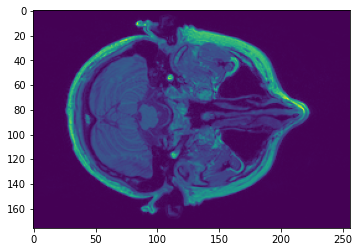

In [63]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(T1w_data.get_fdata()[:,:,100])

## Plot Different Slices
Try slicing different dimensions (x,y,z) to get a feel for how the data is represented in this anatomical image. You can do this by changing the values in the square brackets, e.g., try [100,:,:]

## Look into the Image Header with Nibabel
An image consists of two parts, the data and the header.  The header contains metadata. We can also access data from the image header. Let's assign the header of an image to a variable and print it to view it's contents.

In [64]:
header = T1w_data.header
print(header)      

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 176 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  1.  1.  1.  2.1 0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.5:9e026117'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0043029934
quatern_c       : -0.027260229
quatern_d       : 0.020309016
qoffset_x       : -75.27685
qoffset_y       : -122.23137
qoffset_z 

## Get the Affine Matrix with Nibabel
Some of the important information in the header is information about the orientation of the image in space. This can be represented as the affine matrix, which can be used to transform images between different spaces.

In [65]:
T1w_data.affine

array([[ 9.97687995e-01, -4.08287831e-02, -5.43136634e-02,
        -7.52768478e+01],
       [ 4.03595418e-02,  9.99138057e-01, -9.70819034e-03,
        -1.22231369e+02],
       [ 5.46631739e-02,  7.49367615e-03,  9.98476744e-01,
        -1.28886505e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

## Summary of Nibabel
Nibabel is used to load images into Python. Once ther images are loaded, you can learn more about them by examining their headers. In addition, you can manipulate the images with Python libraries like matplotlib. Let's look at some other Python libraies for neuroimaging.

---

---
# Nilearn

There are many useful tools from the [nilearn](https://nilearn.github.io/index.html) library to help manipulate and visualize neuroimaging data. See their [documentation](https://nilearn.github.io/plotting/index.html#different-plotting-functions) for examples.

This section explores a few of their different plotting functions, which can work directly with nibabel instances.

Some of these functions are SLOW.  If the cell is marked like `[*]` then wait till it finishes running and gets assigned a number!

In [66]:
%matplotlib inline

from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi

## plot_anat

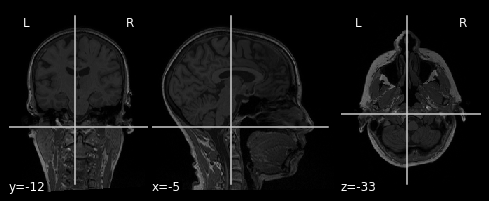

In [67]:
# This is a slow one!
plot_anat(T1w_data)

Nilearn plotting functions are very flexible and allow us to easily customize our plots.   

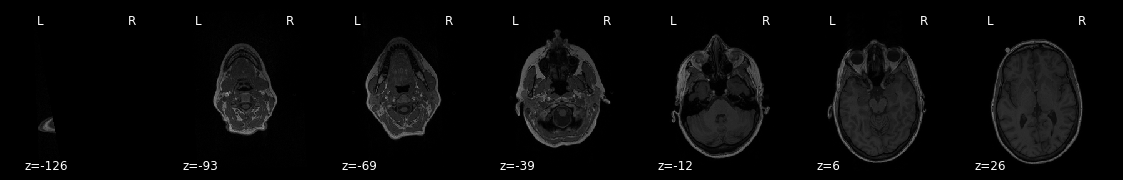

In [68]:
plot_anat(T1w_data, draw_cross=False, display_mode='z')

Try changing the display_mode to x or y.

## Get More Information about plot_anat
Get more information about how to use the function with `?` and try to add different commands to change the plot.

nilearn also has a neat interactive viewer called `view_img` for examining images directly in the notebook. 

In [69]:
plot_anat?

Signature:
plot_anat(
    anat_img=<MNI152Template>,
    cut_coords=None,
    output_file=None,
    display_mode='ortho',
    figure=None,
    axes=None,
    title=None,
    annotate=True,
    threshold=None,
    draw_cross=True,
    black_bg='auto',
    dim='auto',
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x1a7b43280>,
    colorbar=False,
    cbar_tick_format='%.2g',
    vmin=None,
    vmax=None,
    **kwargs,
)
Docstring:
Plot cuts of an anatomical image (by default 3 cuts:
Frontal, Axial, and Lateral)

Parameters
----------
anat_img : Niimg-like object, optional
    See http://nilearn.github.io/manipulating_images/input_output.html
    The anatomical image to be used as a background. If None is
    given, nilearn tries to find a T1 template.
    Default=MNI152TEMPLATE.

cut_coords : None, a :obj:`tuple` of :obj:`float`, or :obj:`int`, optional
    The MNI coordinates of the point where the cut is performed.

        - If ``display_mode`` is 'ortho' or 'tiled', t

## view_img

/Users/dpat/opt/miniconda3/envs/jupyter_neuro/lib/python3.10/site-packages/nilearn/plotting/html_stat_map.py:217: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()



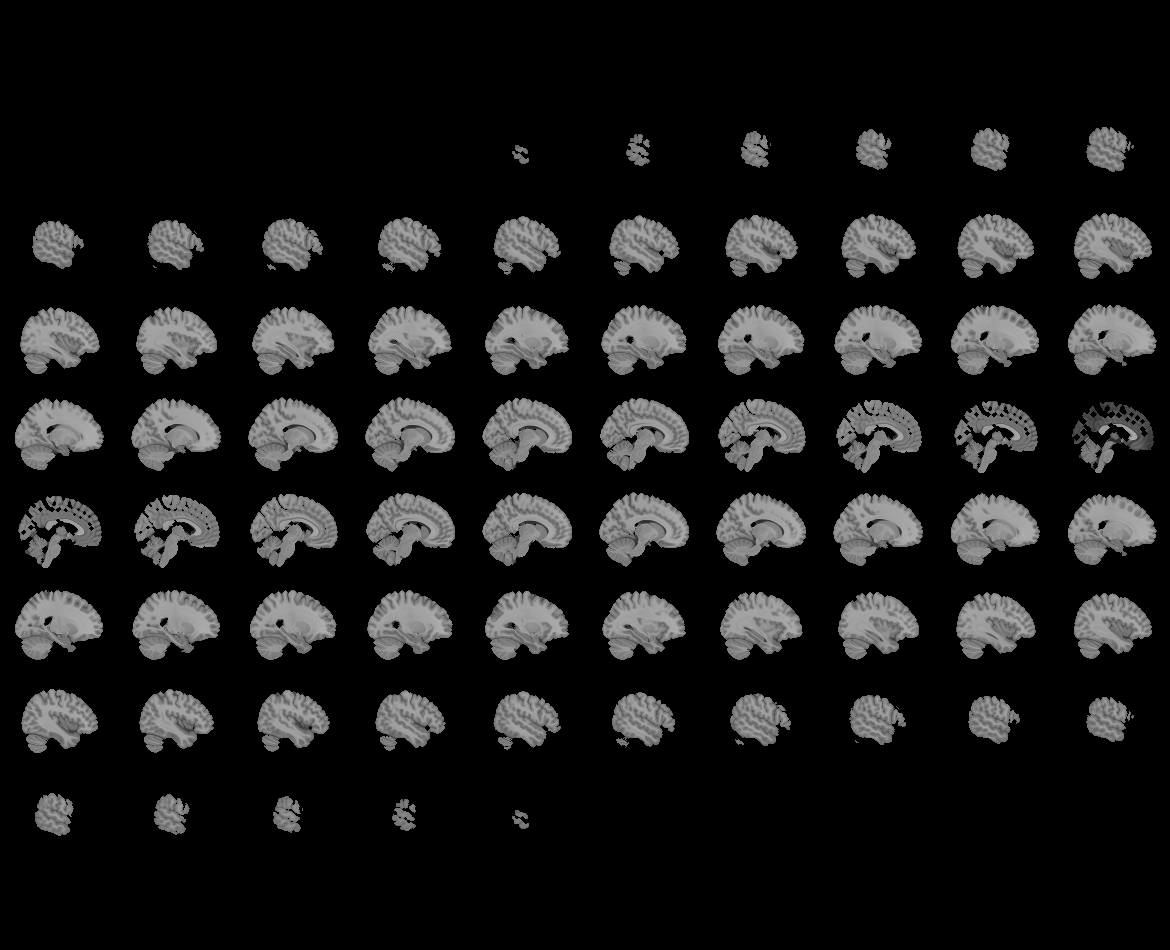
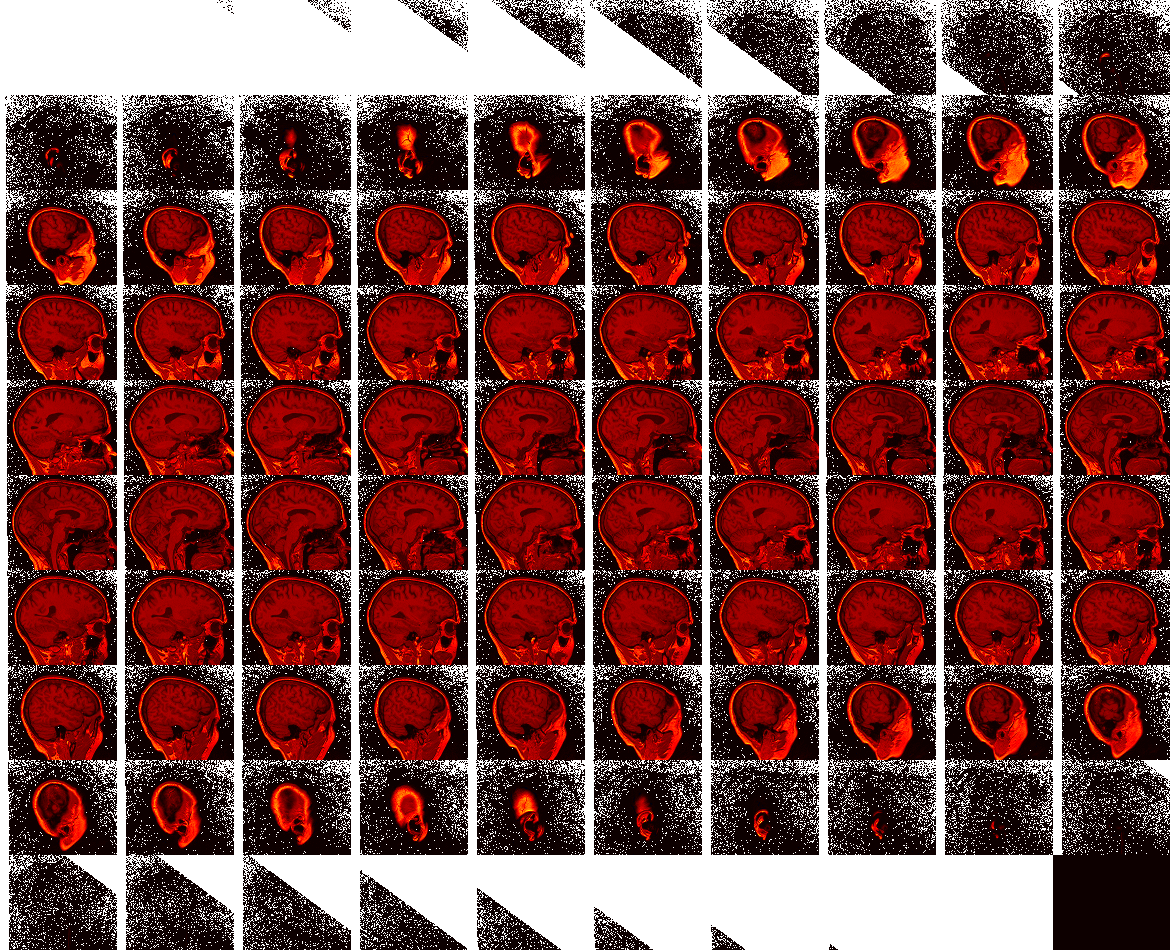

In [70]:
view_img(T1w_data)

The `view_img` function is particularly useful for overlaying statistical maps on an anatomical image to interactively examine where the results are located.

As an example, load a mask of the amygdala and try to find where it is located. Download it from [Neurovault](https://neurovault.org/images/18632/) using a function from `nltools`.

/Users/dpat/opt/miniconda3/envs/jupyter_neuro/lib/python3.10/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
/Users/dpat/opt/miniconda3/envs/jupyter_neuro/lib/python3.10/site-packages/nilearn/image/resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "



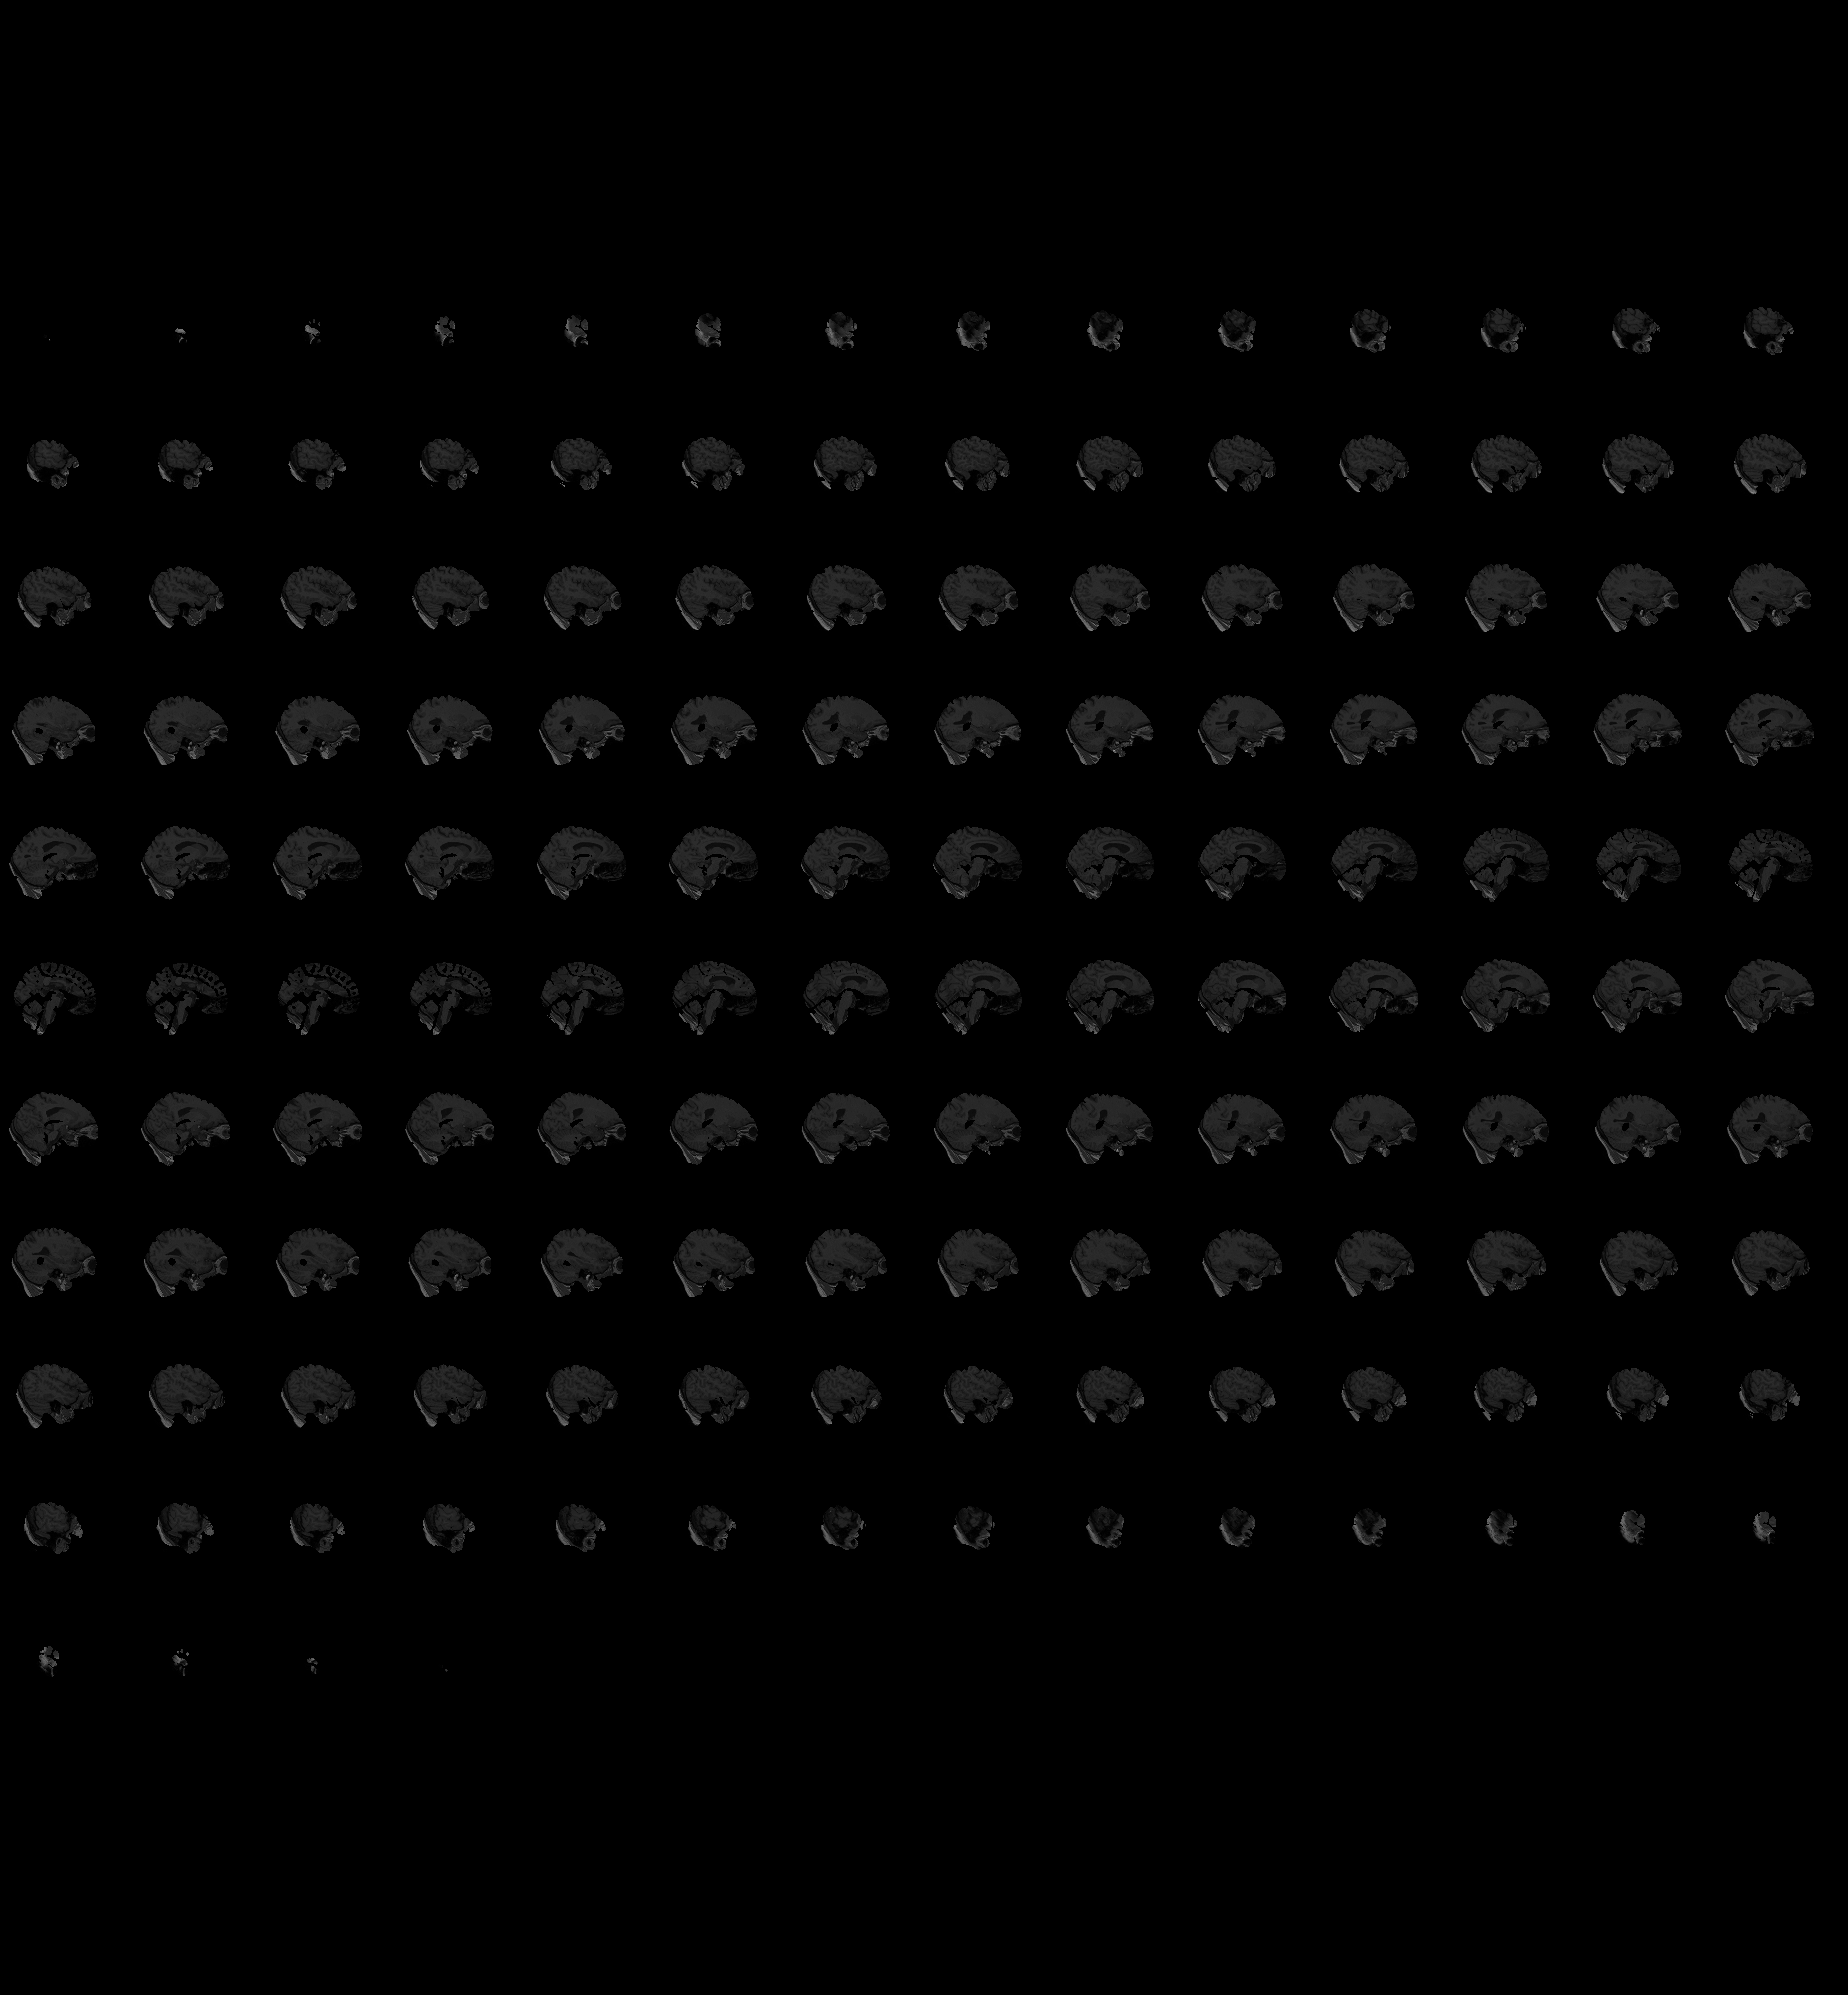
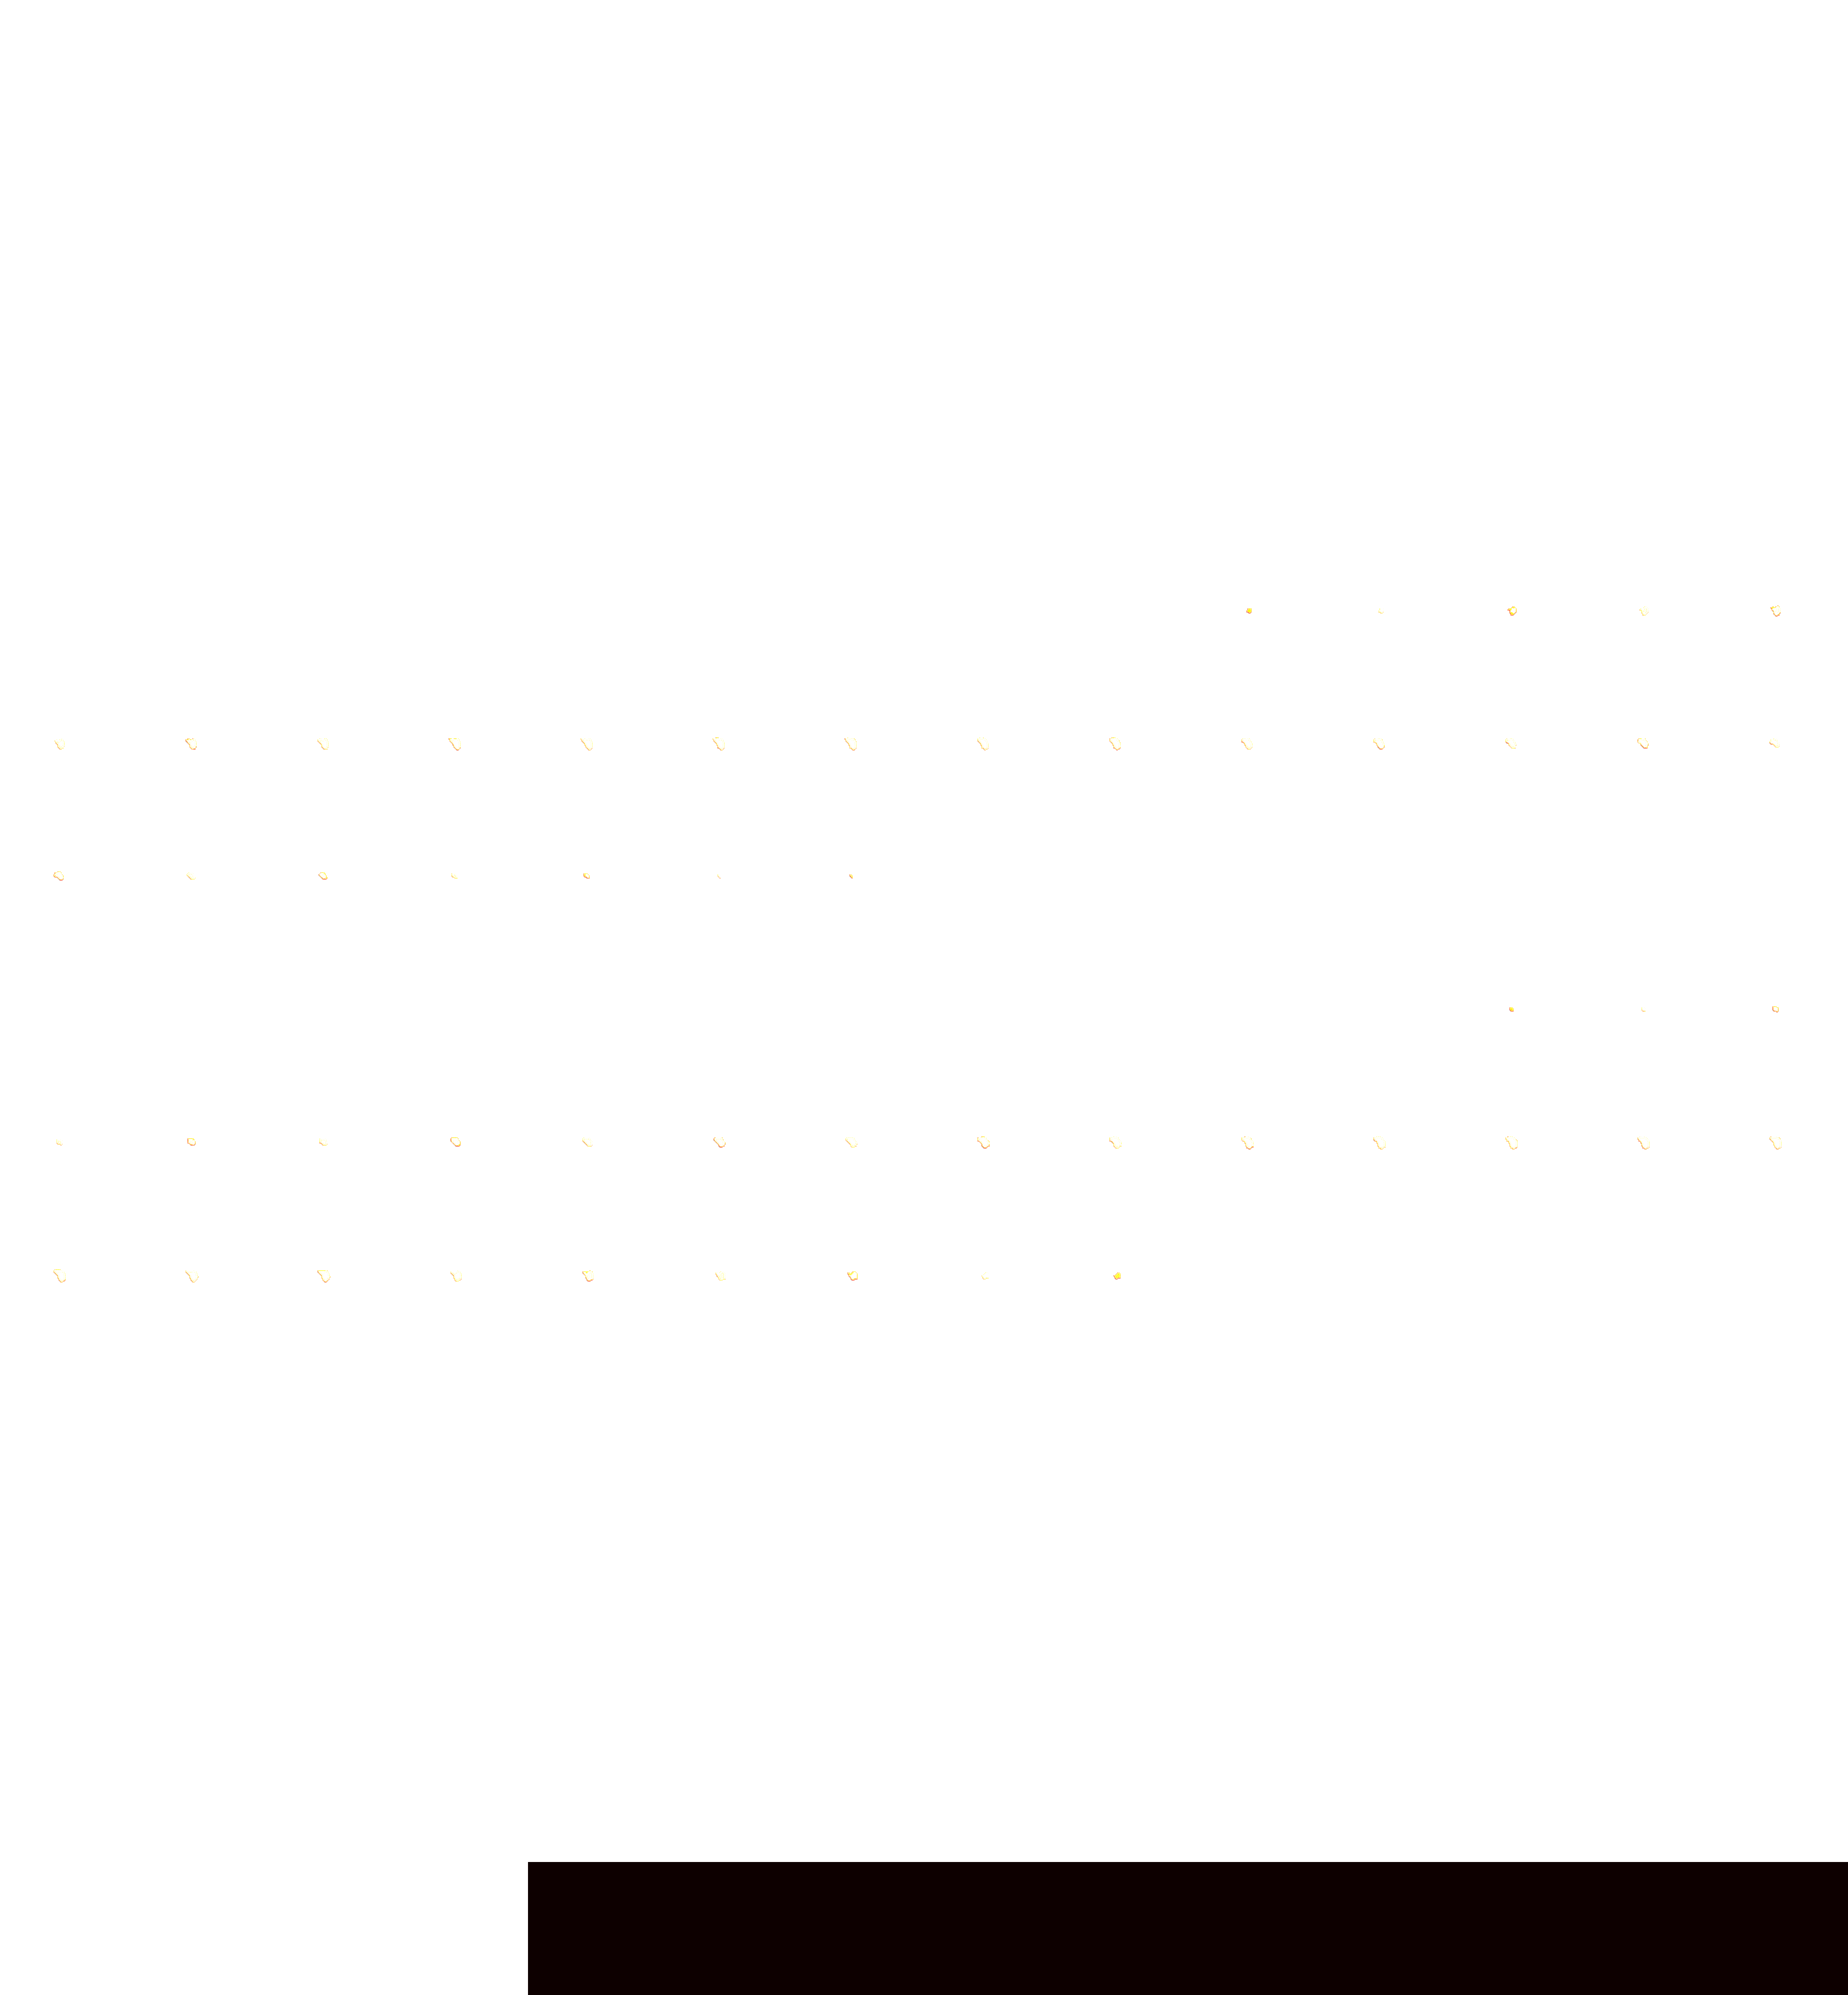

In [71]:
from nltools.data import Brain_Data
amygdala_mask = Brain_Data('https://neurovault.org/media/images/1290/FSL_BAmyg_thr0.nii.gz').to_nifti()

view_img(amygdala_mask, T1w_data)

## Glass Brain
Plot a glass brain which allows us to see through the brain from different slice orientations. In this example, we will plot the binary amygdala mask.

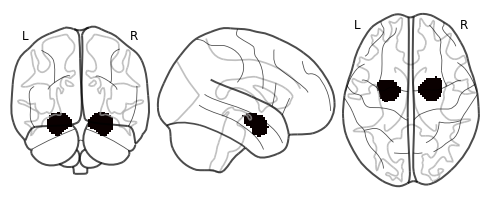

In [72]:
plot_glass_brain(amygdala_mask)

---
# Nltools (a.k.a Neurolearn)

You've learned how to use nibabel to load imaging data and nilearn to plot it.

The `nltools` package tries to make loading, plotting, and manipulating data easier. It uses many functions from nibabel, nilearn, and other python libraries. The bulk of the nltools toolbox is built around the `Brain_Data()` class. The concept behind the class is to have a similar feel to a pandas dataframe, which means that it should feel intuitive to manipulate the data.

The `Brain_Data()` class has several attributes that may be helpful to know about. First, it stores imaging data in `.data` as "vectorized features x observations matrix". 

- Each image is an observation and each voxel is a feature. 
- Space is flattened using `nifti_masker` from nilearn. 
- This object is also stored as an attribute in `.nifti_masker` to allow transformations from 2D to 3D/4D matrices. 
- In addition, a brain_mask is stored in `.mask`. 
- Finally, there are attributes to store either class labels for prediction/classification analyses in `.Y` and design matrices in `.X`. These are both expected to be pandas `DataFrames`.

We will give a quick overview of basic Brain_Data operations, but we encourage you to see our [documentation](https://nltools.org/) for more details.

## Brain_Data basics
To get a feel for the `Brain_Data` class, load an example anatomical overlay image that comes packaged with the toolbox.

In [73]:
from nltools.data import Brain_Data
from nltools.utils import get_anatomical

anat = Brain_Data(get_anatomical())
anat

nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

### Brain_Data View Attributes
To view the attributes of `Brain_Data` use the `vars()` function.

In [74]:
print(vars(anat))

{'mask': <nibabel.nifti1.Nifti1Image object at 0x1ae41d720>, 'nifti_masker': NiftiMasker(mask_img=<nibabel.nifti1.Nifti1Image object at 0x1ae41d720>), 'data': array([1875., 2127., 2182., ..., 5170., 5180., 2836.], dtype=float32), 'Y': Empty DataFrame
Columns: []
Index: [], 'X': Empty DataFrame
Columns: []
Index: [], 'file_name': []}


`Brain_Data` has many methods to help manipulate, plot, and analyze imaging data. We can use the `dir()` function to get a quick list of all of the available methods that can be used on this class.

To learn more about how to use these tools either use the `?` function, or look up the function in the [api documentation](https://nltools.org/api.html).


In [75]:
print(dir(anat))

['X', 'Y', '__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rsub__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', 'aggregate', 'align', 'append', 'apply_mask', 'astype', 'bootstrap', 'copy', 'data', 'decompose', 'detrend', 'distance', 'dtype', 'empty', 'extract_roi', 'file_name', 'filter', 'find_spikes', 'groupby', 'icc', 'iplot', 'isempty', 'mask', 'mean', 'median', 'multivariate_similarity', 'nifti_masker', 'plot', 'predict', 'predict_multi', 'r_to_z', 'randomise', 'regions', 'regress', 'scale', 'shape', 'similarity', 'smooth', 'standardize', 'std', 'sum', 'temporal_resample', 'threshold', 'to_nifti', 'transform_

Ok, now let's load a single subject's functional data from the run 1 resting state dataset. We will load one that has already been preprocessed with fmriprep and is stored in the derivatives folder.

### Load Data
Loading data can be **slow** especially if the data need to be resampled to the template, which is set at $2mm^3$ by default. However, once it's loaded into the workspace it should be relatively fast to work with it.


In [76]:
sub = 'sub-219'
ses = 'ses-itbs'

fmr_data = Brain_Data(os.path.join(data_dir, 'derivatives', 'fmriprep', sub, ses, 'func', f'{sub}_{ses}_task-rest_run-1_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz'))

Here are a few quick basic data operations.

### Print Information about the Dimensions of the Dataset 
Find the number of image volumes in the Brain_Data() instance. This example is a 4D fMRI image with 177 volumes. 

In [77]:
print(len(fmr_data))

177


Find the dimensions of Brain_Data (images x voxels).  The number of voxels from each volume included in the Brain_Data is determined by the brain mask (the 2mm MNI space brain mask you loaded earlier).

In [ ]:
print(fmr_data.shape())

### Learn more about Brain_Data

In [ ]:
Brain_Data?

### Copy the image data
You can copy the Brain_Data object

In [ ]:
fmr_data2 = fmr_data.copy()

### Apply mathematical operations
Alternatively, you can make a modified copy of the data. This example adds 10 to each voxel and multiplies by 2.
Note that most neuroimaging packages contain these sorts of element-by-element mathematical operations.

In [ ]:
fmr_data2 = (fmr_data + 10) * 2

### Remove the linear trend from every voxel
Create another dataset with detrended time series for each voxel 

In [ ]:
fmr_detrend = fmr_data.detrend()
# Return the datatype
fmr_detrend.dtype()

### List the Current variables
Use the ipython magic command [whos](https://ipython.readthedocs.io/en/stable/interactive/magics.html?highlight=%25whos#magic-whos)

In [ ]:
%whos

### Plotting examples
Whether you plot the `mean` or `std`, note how the range of the y-axis changes if you plot `fmr_data` vs `fmr_data2` vs `fmr_detrend`.  Change the examples to plot std instead.

In [ ]:
plt.plot(fmr_data.mean(axis=1))

In [ ]:
# fmr_data2 had 10 added to each voxel and was then doubled
plt.plot(fmr_data2.mean(axis=1))

In [ ]:
plt.plot(fmr_detrend.mean(axis=1))

###  Concatenate Brain_Data
We have several Brain_Data objects now.  It is possible to concatenate them.

In [ ]:
fmr_concat=fmr_data.append(fmr_data2)

In [ ]:
# Print the length of the new Brain_Data object to see that it is indeed 2*177
print(len(fmr_concat))

### Brain_Data to NIfTI
Brain_Data instances can be easily converted to nibabel instances, which store the data in a 3D/4D matrix.  This is useful for interfacing with other python toolboxes such as [nilearn](http://nilearn.github.io)

In [ ]:
fmr_data.to_nifti()

Brain_Data objects can also be written out to disk as NIfTI images.

In [ ]:
fmr_data.write('data/outputs/Tmp_Data.nii.gz')

Lists of `Brain_Data` instances can also be concatenated by recasting as a `Brain_Data` object.

In [ ]:
print(type([x for x in fmr_data[:4]]))

type(Brain_Data([x for x in fmr_data[:4]]))

Images within a Brain_Data() instance are iterable.  Here we use a list comprehension to calculate the overall mean across all voxels within an image.

In [ ]:
[x.mean() for x in fmr_data]

Though, we could also do this with the `mean` method by setting `axis=1`.

In [ ]:
fmr_data.mean(axis=1)

Let's plot the mean to see how the global signal changes over time.

In [ ]:
plt.plot(fmr_data.mean(axis=1))

Notice the slow linear drift over time, where the global signal intensity gradually decreases. We will learn how to remove this with a high pass filter in future tutorials.

### Plotting
There are multiple ways to plot your data.

For a very quick plot, you can return a montage of axial slices with the `.plot()` method. As an example, we will plot the mean of each voxel over time.

In [ ]:
f = fmr_data.mean().plot()

Brain_Data() instances can be converted to a nibabel instance and plotted using any nilearn plot method such as glass brain.


In [ ]:
plot_glass_brain(fmr_data.mean().to_nifti())

Ok, that's the basics. `Brain_Data` can do much more!
Check out some of our [tutorials](https://nltools.org/auto_examples/index.html) for more detailed examples.
